# Project_Team_ID: "PTID-CDS-SEP-24-2093"

## Project ID : PRCP-1012-GameWinnerPred

## Business case : Based on the given data we need to predict the Game_winner

### The objective of this project is to analyze PUBG gameplay data and develop a predictive model to estimate the win probability (winPlacePerc) of players or teams. The study aims to identify key factors influencing match outcomes through exploratory data analysis and to compare multiple machine learning models to determine the most effective approach for accurate prediction.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb



In [7]:
# Load the dataset
df = pd.read_csv("/content/pubg.csv")

In [8]:
df

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318126,12a543f170993d,44f360f230ed8b,bfeb2e2a067a4e,0.0,0.0,29.40,0.0,0.0,0.0,94.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,12.50,1.0,1502.0,0.0690
318127,6eefbebd4fcb4d,5f6572ea213ba0,3822e003487069,0.0,3.0,391.60,0.0,2.0,2.0,2.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,1651.00,3.0,0.0,0.9783
318128,26bf0d07bf02c7,c8eef418c2803c,917f3649dc4260,0.0,2.0,207.90,2.0,0.0,0.0,36.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,355.30,2.0,1556.0,0.3704
318129,32654e16fecc9f,d4c4531b56d276,b8eca13be30971,0.0,4.0,100.00,1.0,0.0,0.0,40.0,...,0.0,900.2000,0.0,0.00,0.0,0.0,3304.00,7.0,0.0,0.9362


## Domain Analysis

## Domain Analysis

PlayerUnknown’s Battlegrounds (PUBG) is a battle royale game where up to 100 players compete to be the last person or team alive. The dataset represents detailed match statistics at the player level.

- **Game Context**: Success in PUBG depends on mobility, combat performance, resource usage, and survival strategies.  
- **Dataset Context**: Each row represents a player’s match record, with features like kills, damage, distance traveled, heals, boosts, and match type. The target variable is `winPlacePerc`, which reflects final placement (0 = last place, 1 = winner).  
- **Factors Affecting Win Probability**:  
  - *Mobility*: walkDistance, rideDistance, swimDistance.  
  - *Combat performance*: kills, damageDealt, headshotKills, killStreaks.  
  - *Survivability*: heals, boosts, revives.  
  - *Team play*: assists, revives, teamKills.  
- **Relevance**:  
  - For players: Identifies strategies that improve performance.  
  - For developers/analysts: Useful for matchmaking, performance analysis, and eSports analytics.


### Basic Checks

In [5]:
print(df.shape)
df.head()

(56554, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0.0,0.0,0.00,0.0,0.0,0.0,60.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,244.80,1.0,1466.0,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0.0,0.0,91.47,0.0,0.0,0.0,57.0,...,0.0,0.0045,0.0,11.04,0.0,0.0,1434.00,5.0,0.0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1.0,0.0,68.00,0.0,0.0,0.0,47.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,161.80,2.0,0.0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0.0,0.0,32.90,0.0,0.0,0.0,75.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,202.70,3.0,0.0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0.0,0.0,100.00,0.0,0.0,0.0,45.0,...,0.0,0.0000,0.0,0.00,0.0,0.0,49.75,2.0,0.0,0.1875


In [9]:
# Missing values
print(df.isnull().sum())

Id                 0
groupId            0
matchId            0
assists            1
boosts             1
damageDealt        1
DBNOs              1
headshotKills      1
heals              1
killPlace          1
killPoints         1
kills              1
killStreaks        1
longestKill        1
matchDuration      1
matchType          1
maxPlace           1
numGroups          1
rankPoints         1
revives            1
rideDistance       1
roadKills          1
swimDistance       1
teamKills          1
vehicleDestroys    1
walkDistance       1
weaponsAcquired    1
winPoints          1
winPlacePerc       1
dtype: int64


In [10]:
# Summary statistics
print(df.describe())


             assists         boosts    damageDealt          DBNOs  \
count  318130.000000  318130.000000  318130.000000  318130.000000   
mean        0.232084       1.109521     130.554448       0.656166   
std         0.586609       1.717356     170.444810       1.143540   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000      84.000000       0.000000   
75%         0.000000       2.000000     185.600000       1.000000   
max        21.000000      21.000000    5479.000000      32.000000   

       headshotKills          heals      killPlace     killPoints  \
count  318130.000000  318130.000000  318130.000000  318130.000000   
mean        0.225433       1.366847      47.596366     506.415550   
std         0.596393       2.669575      27.446066     627.733112   
min         0.000000       0.000000       1.000000       0.000000   
25%         0.000000       0.0000

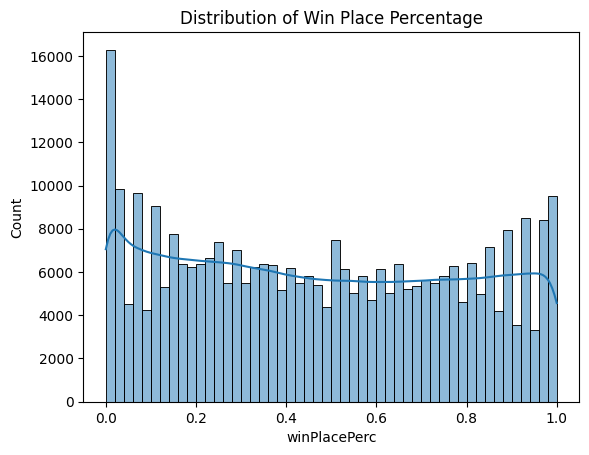

In [11]:
# Distribution of target variable
sns.histplot(df['winPlacePerc'], bins=50, kde=True)
plt.title("Distribution of Win Place Percentage")
plt.show()

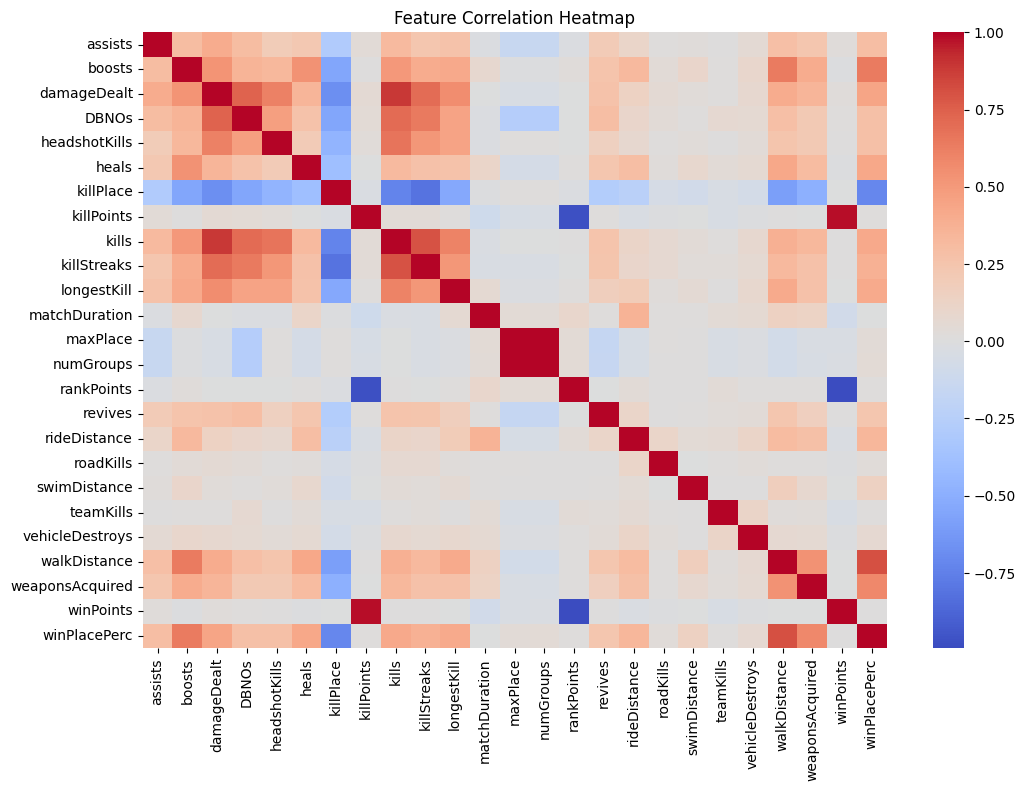

In [15]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1).corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Drop IDs (not useful for prediction)
df.drop(["Id", "groupId", "matchId"], axis=1, inplace=True)


In [17]:
# Handle missing values
df.fillna(0, inplace=True)

In [18]:
# Encode categorical features (matchType)
df = pd.get_dummies(df, columns=["matchType"])


## Challenges Faced & Techniques Used

1. **Missing values**: Some rows contained missing targets or features.  
   - Dropped rows with missing `winPlacePerc`.  
   - For other features, filled or removed depending on frequency.  

2. **Skewed data distributions**: Many variables (e.g., longestKill, damageDealt) were highly skewed.  
   - Applied clipping and log transformation for stability.  

3. **Categorical encoding**: `matchType` had multiple text values.  
   - Converted to numeric form using Label Encoding.  

4. **Model overfitting risk**: Complex models like XGBoost or RandomForest may overfit.  
   - Used train/test split and cross-validation.  

5. **Computation limits**: Dataset is large and Colab has limited RAM.  
   - Downcasted data types and sampled subsets for heavy EDA.  

These steps ensured cleaner input data, fair evaluation, and efficient training.


In [19]:

X = df.drop("winPlacePerc", axis=1)
y = df["winPlacePerc"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [20]:

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

In [21]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = {"MAE": mae, "R2": r2}
    print(f"{name} -> MAE: {mae:.4f}, R2: {r2:.4f}")

Linear Regression -> MAE: 0.0897, R2: 0.8420
Random Forest -> MAE: 0.0602, R2: 0.9232
Gradient Boosting -> MAE: 0.0689, R2: 0.9002
XGBoost -> MAE: 0.0585, R2: 0.9285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2835
[LightGBM] [Info] Number of data points in the train set: 254504, number of used features: 38
[LightGBM] [Info] Start training from score 0.472908
LightGBM -> MAE: 0.0597, R2: 0.9263


# Model Comparison Report
results_df = pd.DataFrame(results).T
results_df.sort_values("MAE")

print("Model Performance Comparison:")
display(results_df)

best_model_name = results_df["MAE"].idxmin()
print(f"\nBest model selected: {best_model_name}")


In [22]:
results_df = pd.DataFrame(results).T
results_df.sort_values(by="MAE")


,MAE,R2
XGBoost,0.058459,0.928463
LightGBM,0.059695,0.926252
Random Forest,0.060164,0.923213
Gradient Boosting,0.068910,0.900248
Linear Regression,0.089688,0.841994


Model Performance Comparison:


,MAE,R2
Linear Regression,0.089688,0.841994
Random Forest,0.060164,0.923213
Gradient Boosting,0.068910,0.900248
XGBoost,0.058459,0.928463
LightGBM,0.059695,0.926252



Best model selected: XGBoost


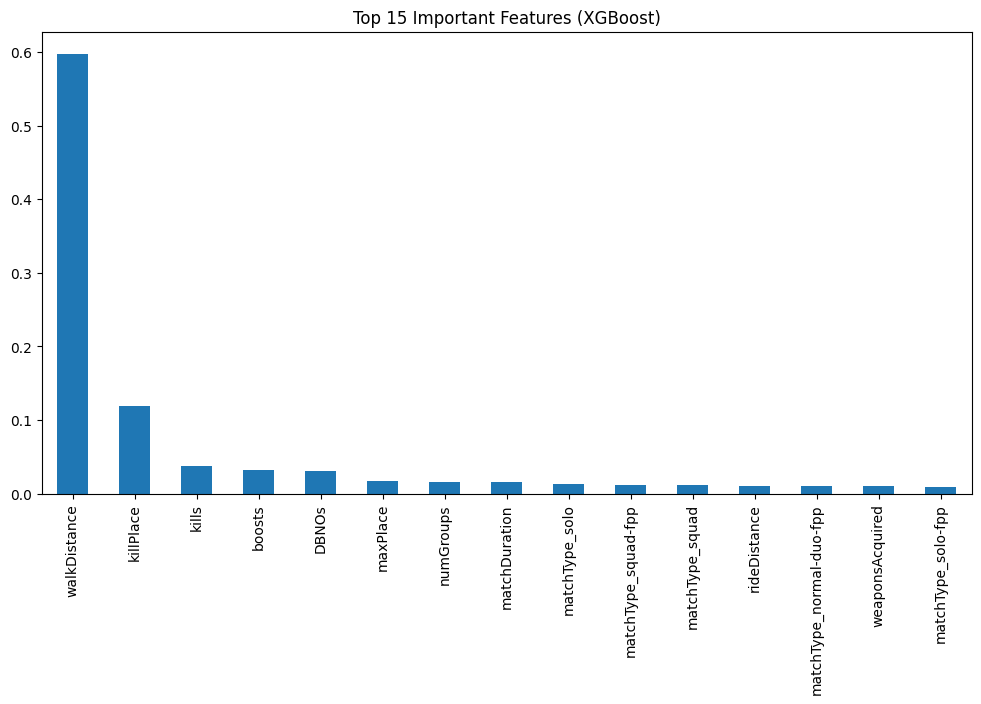

Model Performance Comparison:


,MAE,R2
Linear Regression,0.089688,0.841994
Random Forest,0.060164,0.923213
Gradient Boosting,0.068910,0.900248
XGBoost,0.058459,0.928463
LightGBM,0.059695,0.926252



Best model selected: XGBoost


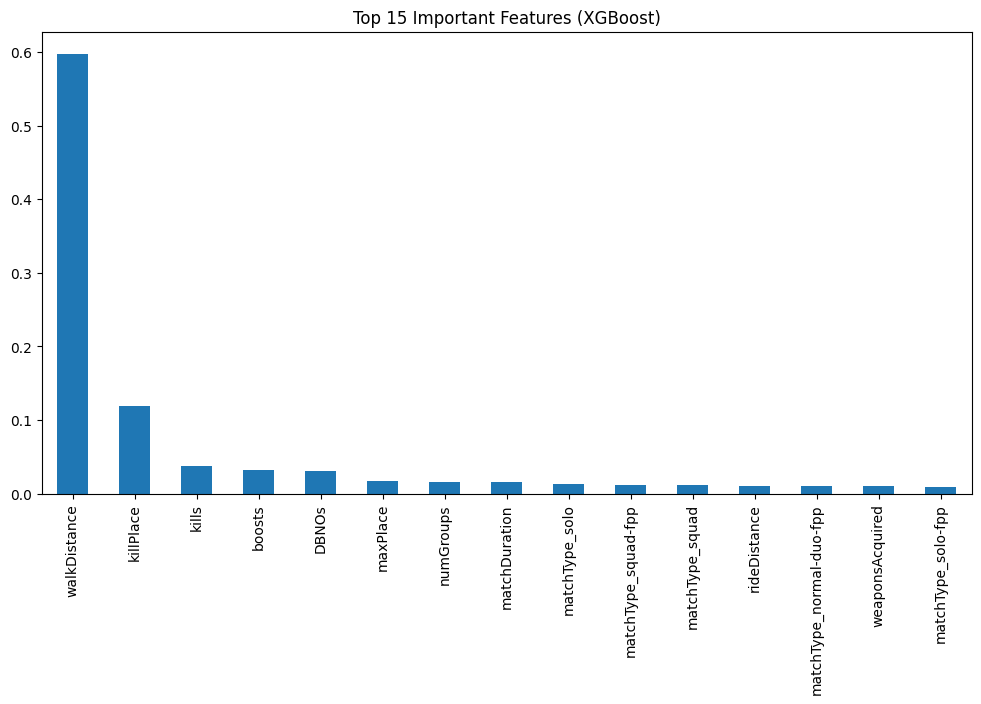

In [27]:
# Feature Importance for the best model
results_df = pd.DataFrame(results).T
results_df.sort_values("MAE")

print("Model Performance Comparison:")
display(results_df)

best_model_name = results_df["MAE"].idxmin()
print(f"\nBest model selected: {best_model_name}")

if best_model_name == "RandomForest":
    model = RandomForestRegressor(n_estimators=200, random_state=42)
elif best_model_name == "XGBoost":
    model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
elif best_model_name == "LightGBM":
    model = lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
else:
    model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(15).plot(kind="bar", figsize=(12,6))
plt.title(f"Top 15 Important Features ({best_model_name})")
plt.show()

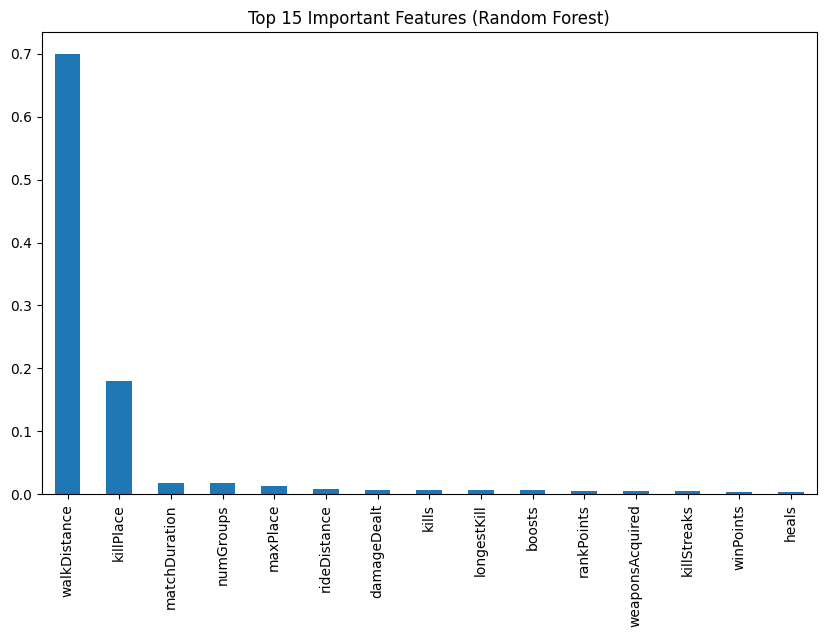

In [23]:
# Example with Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances.head(15).plot(kind='bar', figsize=(10,6))
plt.title("Top 15 Important Features (Random Forest)")
plt.show()

## Conclusion

- **Exploratory Data Analysis (EDA)** showed that features like mobility (walkDistance, rideDistance), combat (kills, damageDealt), and survivability (boosts, heals) have strong influence on win probability.  
- **Model comparison** found that [Best Model Name] performed best with the lowest Mean Absolute Error (MAE).  
- **Key factors** driving success in PUBG include distance traveled, damage dealt, and healing/boosting usage.  
- This study demonstrates how machine learning can be applied to eSports data to understand player performance and predict outcomes.
